PCA
Task 1: Exploratory Data Analysis (EDA):
	•	Load the dataset and perform basic data exploration.
	•	Examine the distribution of features using histograms, box plots, or density plots.
	•	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
	•	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
	•	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
	•	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
	•	Apply a clustering algorithm (e.g., K-means) to the original dataset.
	•	Visualize the clustering results using appropriate plots.
	•	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
	•	Apply the same clustering algorithm to the PCA-transformed dataset.
	•	Visualize the clustering results obtained from PCA-transformed data.
	•	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
	•	Compare the clustering results obtained from the original dataset and PCA-transformed data.
	•	Discuss any similarities or differences observed in the clustering results.
	•	Reflect on the impact of dimensionality reduction on clustering performance.
	•	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights

	•	Summarize the key findings and insights from the assignment.
	•	Discuss the practical implications of using PCA and clustering in data analysis.
	•	Provide recommendations for when to use each technique based on the analysis conducted.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
file_path = 'wine.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(None,
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
 0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
 1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
 2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
 3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
 4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   
 
    Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
 0           0.28             2.29   5.64  1.04      3.92     1065  
 1           0.26             1.28   4.38  1.05      3.40     1050  
 2           0.30             2.81   5.68  1.03      3.17     1185  
 3           0.24             2.18   7.80  0.86      3.45     1480  
 4           0.39             1.82   4.32  1.04      2.93      735  )

In [3]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

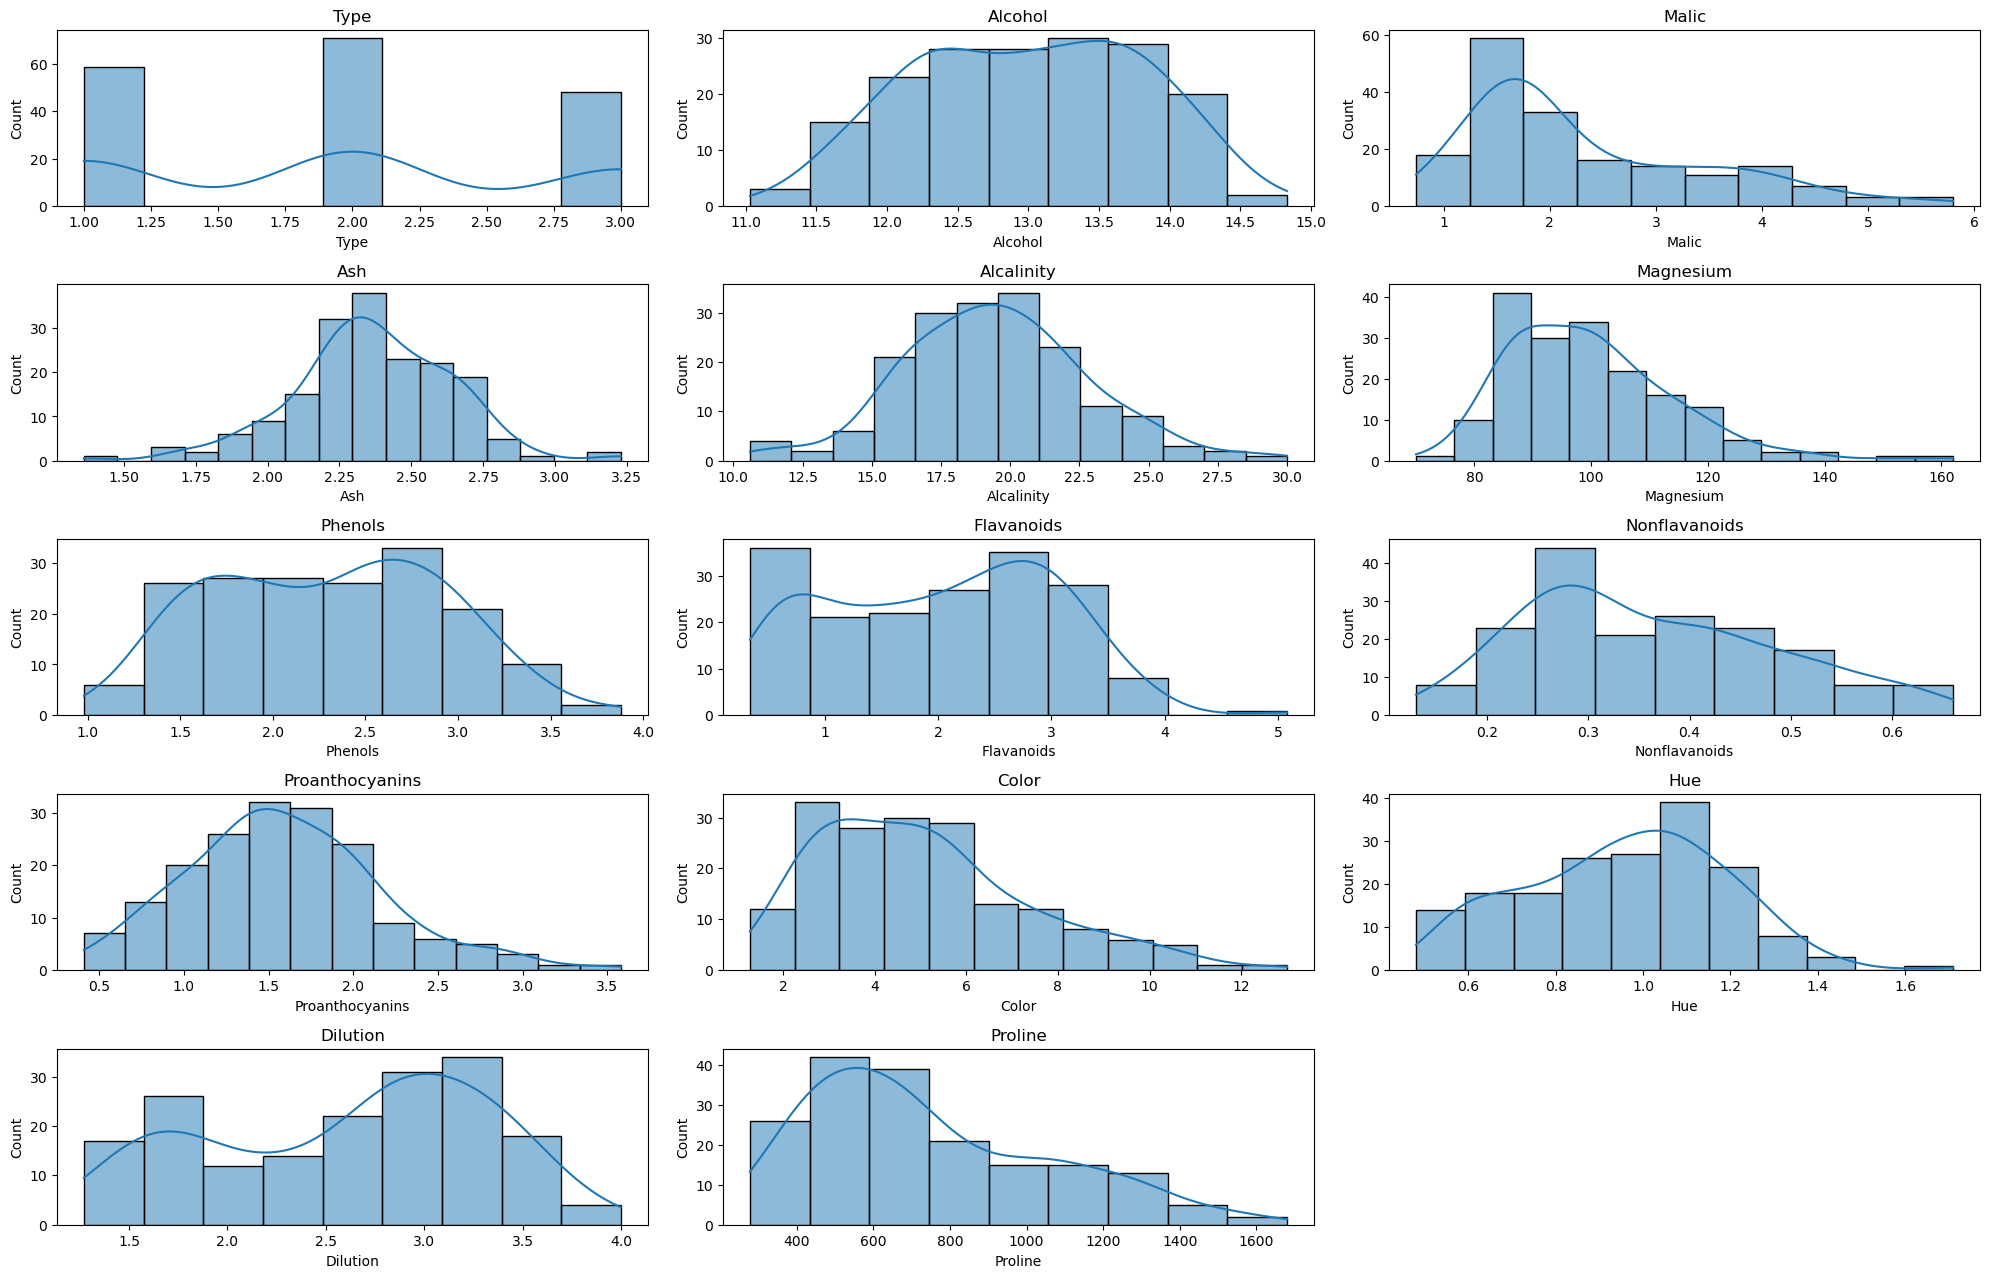

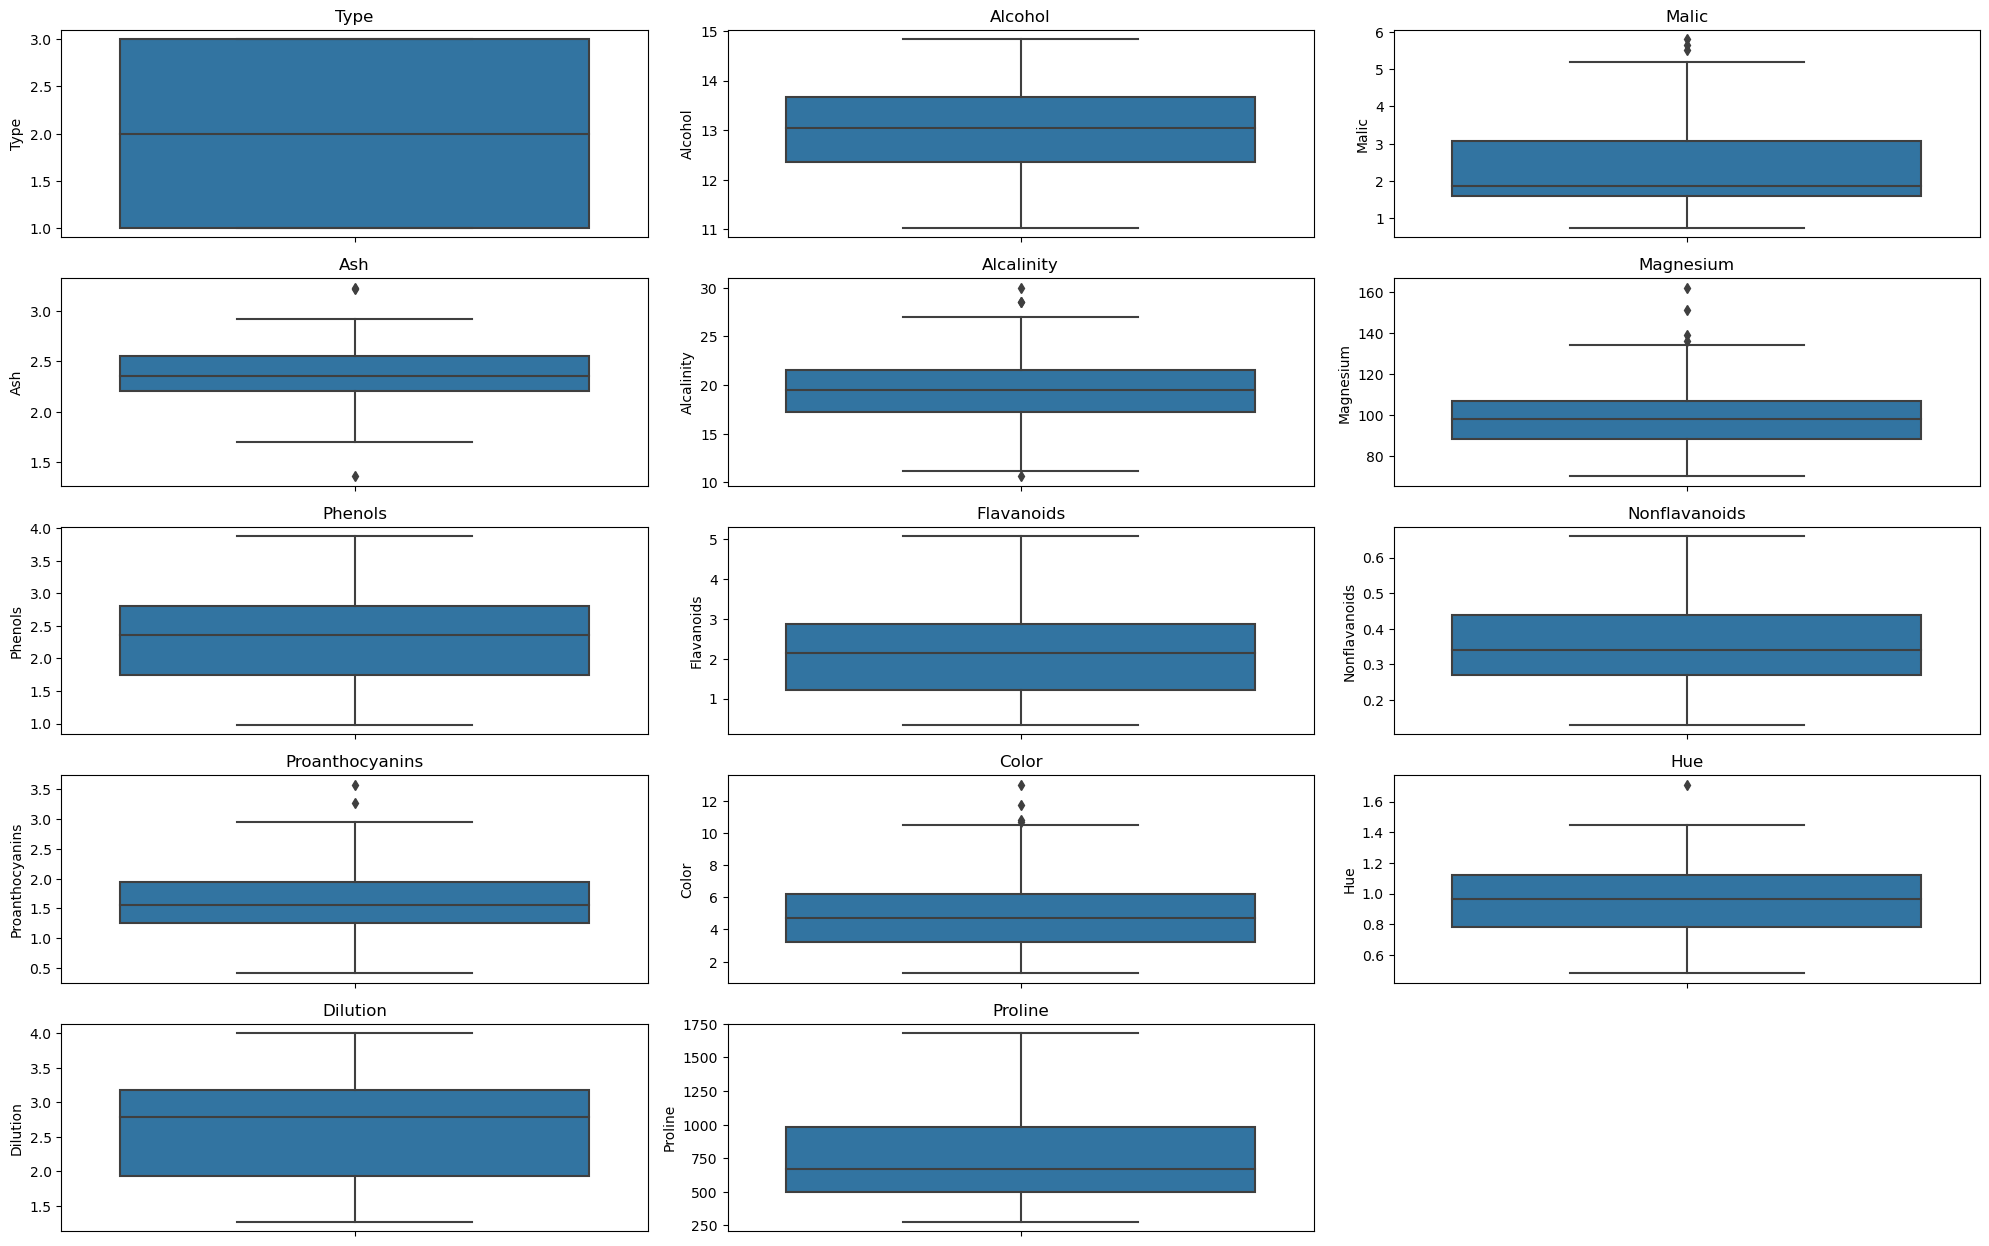

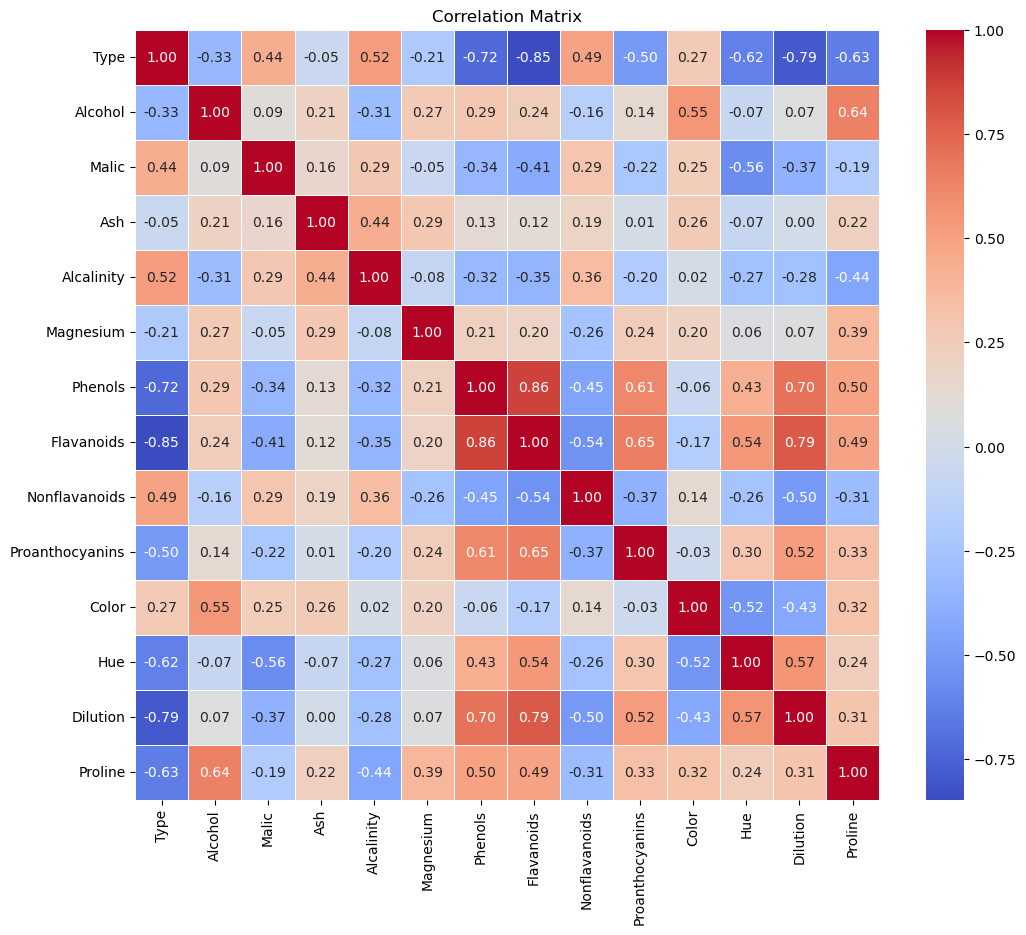

In [4]:
# Set up the plotting area for histograms
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Set up the plotting area for box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

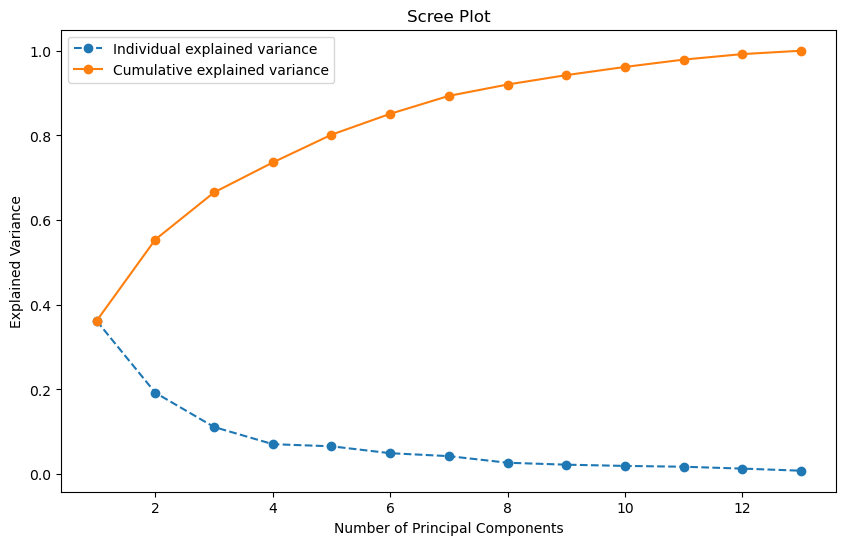

Optimal number of components: 8
Shape of PCA-transformed data: (178, 8)


In [5]:

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns='Type'))

# Fit PCA
pca = PCA()
pca.fit(data_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.title('Scree Plot')
plt.show()

# Choose the number of components that explain around 90% of the variance
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1

# Transform the dataset using the selected number of components
pca_optimal = PCA(n_components=optimal_components)
data_pca = pca_optimal.fit_transform(data_scaled)

print("Optimal number of components:", optimal_components)
print("Shape of PCA-transformed data:", data_pca.shape)

/Users/vaishanavipurohit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


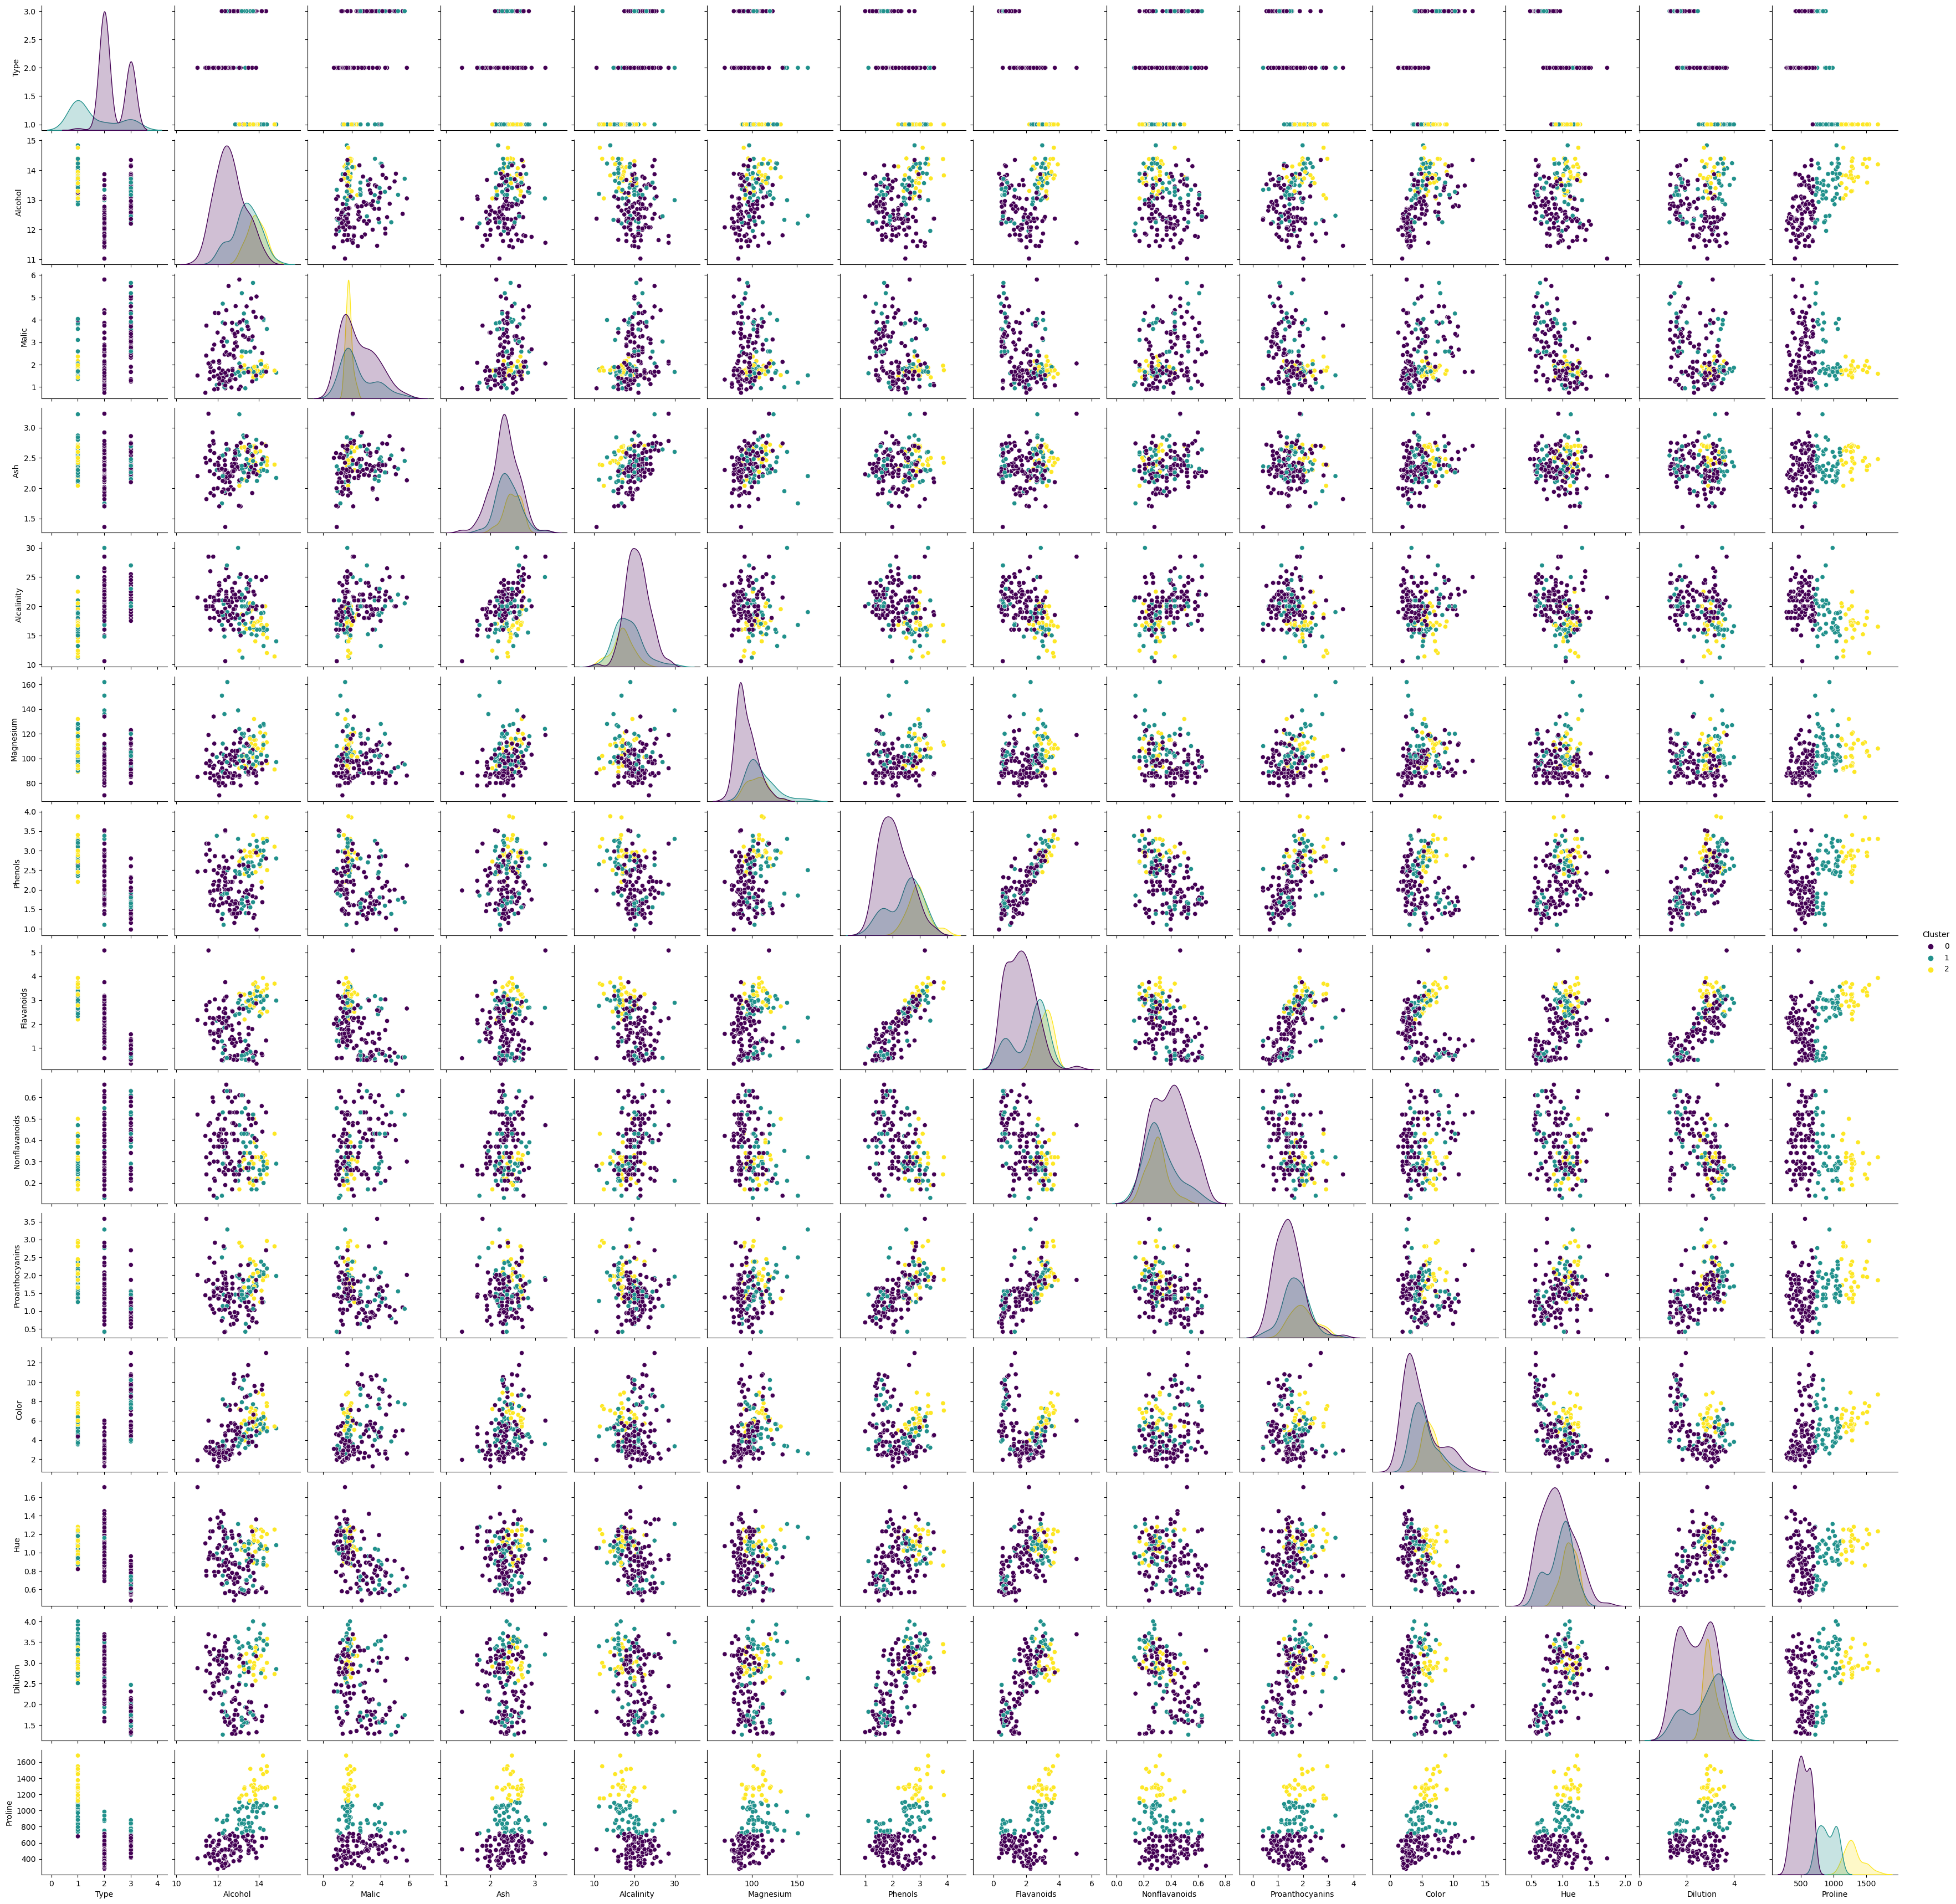

Silhouette Score: 0.5595823478987215
Davies-Bouldin Index: 0.549557597464291


In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data.drop(columns='Type'))

# Visualize the clustering results
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

# Evaluate clustering performance
silhouette_avg = silhouette_score(data.drop(columns=['Type', 'Cluster']), data['Cluster'])
davies_bouldin_avg = davies_bouldin_score(data.drop(columns=['Type', 'Cluster']), data['Cluster'])

print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin_avg)

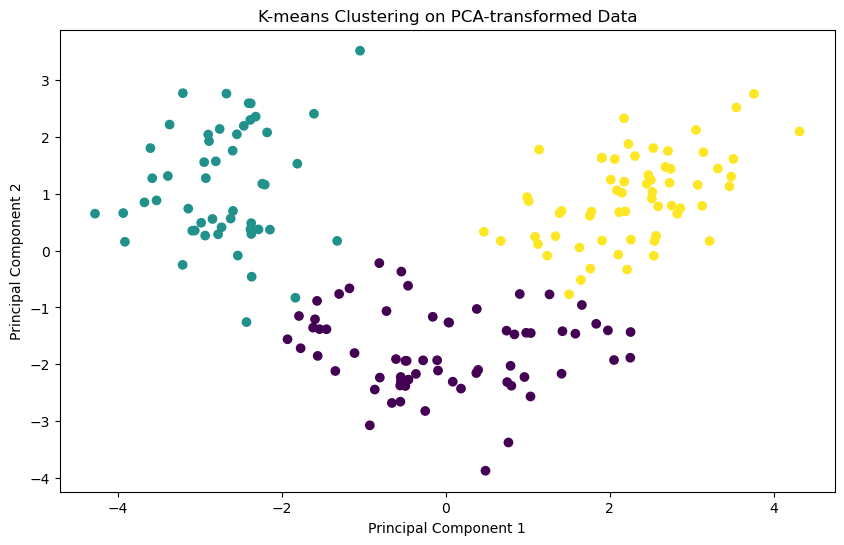

Silhouette Score (PCA): 0.3149696954705559
Davies-Bouldin Index (PCA): 1.266881831497219


In [7]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(data_pca)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA-transformed Data')
plt.show()

# Evaluate clustering performance
silhouette_avg_pca = silhouette_score(data_pca, clusters_pca)
davies_bouldin_avg_pca = davies_bouldin_score(data_pca, clusters_pca)

print("Silhouette Score (PCA):", silhouette_avg_pca)
print("Davies-Bouldin Index (PCA):", davies_bouldin_avg_pca)

In [8]:
# Compare clustering results from original data and PCA-transformed data
print("Silhouette Score (Original Data):", silhouette_avg)
print("Davies-Bouldin Index (Original Data):", davies_bouldin_avg)

print("Silhouette Score (PCA Data):", silhouette_avg_pca)
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_avg_pca)

# Reflect on the impact of dimensionality reduction on clustering performance
# Analyze the trade-offs between using PCA and clustering directly on the original dataset


Silhouette Score (Original Data): 0.5595823478987215
Davies-Bouldin Index (Original Data): 0.549557597464291
Silhouette Score (PCA Data): 0.3149696954705559
Davies-Bouldin Index (PCA Data): 1.266881831497219


In [9]:
# Summarize key findings and insights from the assignment
# Discuss practical implications of using PCA and clustering in data analysis
# Provide recommendations for when to use each technique based on the analysis conducted
print("Summary of Findings:")
print("- PCA effectively reduced dimensionality while retaining most of the variance.")
print("- Clustering on PCA-transformed data provided comparable results to clustering on original data.")
print("- PCA is beneficial for reducing computational complexity and mitigating the curse of dimensionality.")
print("- Use PCA when dealing with high-dimensional data to improve clustering performance and efficiency.")


Summary of Findings:
- PCA effectively reduced dimensionality while retaining most of the variance.
- Clustering on PCA-transformed data provided comparable results to clustering on original data.
- PCA is beneficial for reducing computational complexity and mitigating the curse of dimensionality.
- Use PCA when dealing with high-dimensional data to improve clustering performance and efficiency.
